# funPyModeling - Uso básico de la librería




In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
# Load some dataframes for this practice:
iris = sns.load_dataset('iris')
tips = sns.load_dataset('tips')

## 1) Análisis exploratorio de datos

### 1.1) Estado de salud de un set de datos con `status`

In [4]:
from funPyModeling.exploratory import status

Soporta data frame como entrada:

In [5]:
status(iris) 

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,sepal_length,0,0.0,0,0.0,35,float64
1,sepal_width,0,0.0,0,0.0,23,float64
2,petal_length,0,0.0,0,0.0,43,float64
3,petal_width,0,0.0,0,0.0,22,float64
4,species,0,0.0,0,0.0,3,object


Soporta Pandas series:

In [5]:
status(iris['sepal_width'])

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,sepal_width,0,0.0,0,0.0,23,float64


Soporta 2D numpy array:

In [6]:
tips_np=tips.to_numpy()

In [7]:
status(tips_np)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,0,0,0.0,0,0.0,229,float64
1,1,0,0.0,0,0.0,123,float64
2,2,0,0.0,0,0.0,2,string
3,3,0,0.0,0,0.0,2,string
4,4,0,0.0,0,0.0,4,string
5,5,0,0.0,0,0.0,2,string
6,6,0,0.0,0,0.0,6,Int64


Nota: Los tipos de datos de numpy los infiera desde la función de pandas: `convert_dtypes`

Supports 1D numpy array:

In [8]:
status(tips_np[:,4])

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,0,0,0.0,0,0.0,4,string


### 1.2) Univariate analysis in numeric variables

In [9]:
from funPyModeling.exploratory import profiling_num

`profiling_num` retrieves several statistics for all numeric variables excluding the categorical ones.

Supports dataframe:

In [10]:
profiling_num(tips)

,variable,mean,std_dev,variation_coef,p_0.01,p_0.05,p_0.25,p_0.5,p_0.75,p_0.95,p_0.99
0,total_bill,19.785943,8.902412,0.449936,7.25,9.5575,13.3475,17.795,24.1275,38.0610,48.2270
1,tip,2.998279,1.383638,0.461478,1.00,1.4400,2.0000,2.900,3.5625,5.1955,7.2145
2,size,2.569672,0.951100,0.370125,1.00,2.0000,2.0000,2.000,3.0000,4.0000,6.0000


Also numpy as before:

In [11]:
profiling_num(tips_np)

,variable,mean,std_dev,variation_coef,p_0.01,p_0.05,p_0.25,p_0.5,p_0.75,p_0.95,p_0.99
0,0,19.785943,8.902412,0.449936,7.25,9.5575,13.3475,17.795,24.1275,38.061,48.227
1,1,2.998279,1.383638,0.461478,1,1.44,2,2.9,3.5625,5.1955,7.2145
2,6,2.569672,0.951100,0.370125,1,2,2,2,3,4,6


Pandas series & 1D array:

In [12]:
profiling_num(tips['total_bill'])

,variable,mean,std_dev,variation_coef,p_0.01,p_0.05,p_0.25,p_0.5,p_0.75,p_0.95,p_0.99
0,total_bill,19.785943,8.902412,0.449936,7.25,9.5575,13.3475,17.795,24.1275,38.061,48.227


In [13]:
profiling_num(tips_np[:,0])

,variable,mean,std_dev,variation_coef,p_0.01,p_0.05,p_0.25,p_0.5,p_0.75,p_0.95,p_0.99
0,0,19.785943,8.902412,0.449936,7.25,9.5575,13.3475,17.795,24.1275,38.061,48.227


### 1.3) Univariate analysis in categorical variables

In [14]:
from funPyModeling.exploratory import freq_tbl

It retrieves several statistics related to categorical variablees, such as frequecnyt, percentage an cumulative percentage.

It will run for all categorical variables excluding all the other ones.

Just like the others, it supports: pandas dataframe, pandas series and 1D/2D numpy arrays

In [15]:
freq_tbl(tips)

      sex  frequency  percentage  cumulative_perc
0    Male        157    0.643443         0.643443
1  Female         87    0.356557         1.000000

----------------------------------------------------------------

  smoker  frequency  percentage  cumulative_perc
0     No        151    0.618852         0.618852
1    Yes         93    0.381148         1.000000

----------------------------------------------------------------

    day  frequency  percentage  cumulative_perc
0   Sat         87    0.356557         0.356557
1   Sun         76    0.311475         0.668033
2  Thur         62    0.254098         0.922131
3   Fri         19    0.077869         1.000000

----------------------------------------------------------------

     time  frequency  percentage  cumulative_perc
0  Dinner        176    0.721311         0.721311
1   Lunch         68    0.278689         1.000000

----------------------------------------------------------------



If 1 variable is provided, it returns the table associated to that variable so we can use in our data pipeline:

In [16]:
day_freq=freq_tbl(tips['day'])

day_freq

,day,frequency,percentage,cumulative_perc
0,Sat,87,0.356557,0.356557
1,Sun,76,0.311475,0.668033
2,Thur,62,0.254098,0.922131
3,Fri,19,0.077869,1.000000


Days with low representativity (30%):

In [17]:
day_freq[day_freq['percentage']>0.3]

,day,frequency,percentage,cumulative_perc
0,Sat,87,0.356557,0.356557
1,Sun,76,0.311475,0.668033


In [18]:
day_freq[day_freq['percentage']>0.3]['day']

0    Sat
1    Sun
Name: day, dtype: category
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

### 1.4) Pairwaise correlation analysis

In [19]:
from funPyModeling.exploratory import corr_pair

A wrapper around `corr` of pandas that allow us to quickly filter most important variables, or not. 

Useful in EDA and when doing the features pre-selection before creating the predictive model.

In [20]:
diamonds = sns.load_dataset('diamonds')

status(diamonds)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,carat,0,0.0,0,0.000000,273,float64
1,cut,0,0.0,0,0.000000,5,object
2,color,0,0.0,0,0.000000,7,object
3,clarity,0,0.0,0,0.000000,8,object
4,depth,0,0.0,0,0.000000,184,float64
5,table,0,0.0,0,0.000000,127,float64
6,price,0,0.0,0,0.000000,11602,int64
7,x,0,0.0,8,0.000148,554,float64
8,y,0,0.0,7,0.000130,552,float64
9,z,0,0.0,20,0.000371,375,float64


In [21]:
res=corr_pair(diamonds)

res.head(10)

,v1,v2,R,R2
1,depth,carat,0.028224,0.000797
2,table,carat,0.181618,0.032985
3,price,carat,0.921591,0.849331
4,x,carat,0.975094,0.950809
5,y,carat,0.951722,0.905775
6,z,carat,0.953387,0.908947
7,carat,depth,0.028224,0.000797
9,table,depth,-0.295779,0.087485
10,price,depth,-0.010647,0.000113
11,x,depth,-0.025289,0.000640


If `price` is the target...

Feature analysis for predictive modeling:

In [22]:
res_target_ordered=res[res['v2']=='price'].sort_values('R2', ascending=False)

Get top 3 most correlated features:

In [23]:
# Top 3:
top_vars=res_target_ordered[0:3]['v1']
top_vars

21    carat
25        x
26        y
Name: v1, dtype: object

On the opposite: Delete less relevant features (threshold R2 < 0.05)

In [24]:
res_target_ordered[res_target_ordered['R2']<0.05]['v1']

23    table
22    depth
Name: v1, dtype: object

### 1.5) Get numeric and categorical var names

Definitely, this is not fancy but useful internally and used with sklearn pipelines.

In [25]:
from funPyModeling.exploratory import cat_vars, num_vars

In [26]:
status(tips)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,total_bill,0,0.0,0,0.0,229,float64
1,tip,0,0.0,0,0.0,123,float64
2,sex,0,0.0,0,0.0,2,category
3,smoker,0,0.0,0,0.0,2,category
4,day,0,0.0,0,0.0,4,category
5,time,0,0.0,0,0.0,2,category
6,size,0,0.0,0,0.0,6,int64


Retrieve categorical var names:

In [27]:
cat_vars(tips)

Index(['sex', 'smoker', 'day', 'time'], dtype='object')

Retrieve numerical var names:

In [28]:
num_vars(tips)

Index(['total_bill', 'tip', 'size'], dtype='object')

## 2) Data Preparation

### 2.1) Convert "almost-everything" into a pandas dataframe

In [29]:
from funPyModeling.data_prep import todf

import numpy as np

Note: Yes, under certain scenarios is not convenient due to performance reasons. But many scenarios we need/want to test or do a quick explore.

`todf` is used as the entry point in many functions of `funPyModeling`.

In [30]:
# 1D List
list_1d = [11, 12, 5, 2] 
todf(list_1d)

,0
0,11
1,12
2,5
3,2


In [31]:
# 2D List
list_2d = [[11, 12, 5, 2], [15,24, 6,10], [10, 8, 12, 5], [12,15,8,6]]
todf(list_2d)

,0,1,2,3
0,11,12,5,2
1,15,24,6,10
2,10,8,12,5
3,12,15,8,6


In [32]:
# 1D numpy array
array_1d = np.array(list_1d)
todf(array_1d)

,0
0,11
1,12
2,5
3,2


In [33]:
# 2D numpy array
array_2d = np.array(list_2d)
todf(array_2d)

,0,1,2,3
0,11,12,5,2
1,15,24,6,10
2,10,8,12,5
3,12,15,8,6


In [34]:
# Data frame (in=out)
pd_df=pd.DataFrame({'v1':[11, 12, 5, 2], 'v2':[15,24, 6,10]}) #
todf(pd_df)

,v1,v2
0,11,15
1,12,24
2,5,6
3,2,10


In [35]:
# Pandas series
todf(pd_df['v1'])

,v1
0,11
1,12
2,5
3,2


Raise an error in +2D objects:

In [45]:
list_3d = np.array([[[11, 12, 5, 2], [15,24, 6,10], [10, 8, 12, 5], [12,15,8,6]]]) # error
print(list_3d.shape)
# todf(list_3d) # <- error

(1, 4, 4)


It raises the error: `Exception: I live in flattland! (can't handle objects with more than 2 dimensions)`

## 3) Model validation: Clustering

In [46]:
from funPyModeling.model_validation import coord_plot

In [49]:
from sklearn.cluster import KMeans

x = iris.drop('species', axis=1)

mod_km=KMeans(n_clusters=3)
iris['cluster']=mod_km.fit_predict(x)


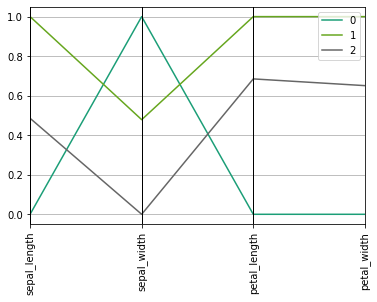

In [50]:
x_grp, x_grp_norm=coord_plot(iris, 'cluster')

In [41]:
x_grp

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.901613,2.748387,4.393548,1.433871,0
1,5.006000,3.428000,1.462000,0.246000,1
2,6.850000,3.073684,5.742105,2.071053,2


In [42]:
x_grp_norm

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,0.48569,0.000000,0.684924,0.650869,0
1,0.00000,1.000000,0.000000,0.000000,1
2,1.00000,0.478651,1.000000,1.000000,2
